In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("housing.csv")
#could have specified the delimiter if it was not present already

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
data.dropna(inplace=True)

In [16]:
data.info()
#now we have equal number of non-null data in every column and have dropped the rows with missing data fields

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [33]:
#now we wish to split the data into training and testing data, so we will make the required demaarcation
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [34]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [35]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [36]:
#we split the data and after splitting it, have a seperate train data to train the machine learning model and the test data to test how well the model has trained 
#so for this, we have kept aside 20% of the data for testing purpose exclusively 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [37]:
train_data= X_train.join(y_train)

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7521,-118.26,33.91,39.0,967.0,256.0,903.0,256.0,1.9038,<1H OCEAN,93100.0
7030,-118.10,33.96,36.0,1184.0,240.0,946.0,232.0,4.0357,<1H OCEAN,162500.0
16804,-122.42,37.66,36.0,725.0,121.0,335.0,140.0,4.1250,NEAR OCEAN,327600.0
41,-122.26,37.83,51.0,936.0,311.0,517.0,249.0,1.2852,NEAR BAY,150000.0
16621,-120.95,35.44,30.0,6346.0,1410.0,1769.0,887.0,2.6864,NEAR OCEAN,283600.0
...,...,...,...,...,...,...,...,...,...,...
8229,-118.20,33.77,40.0,2034.0,899.0,1257.0,797.0,1.2864,NEAR OCEAN,131300.0
14921,-117.02,32.59,19.0,1902.0,335.0,1102.0,313.0,3.0365,NEAR OCEAN,98100.0
6411,-118.02,34.12,36.0,1471.0,246.0,751.0,230.0,5.4555,INLAND,395100.0
17037,-122.25,37.49,43.0,2607.0,477.0,1225.0,461.0,4.2240,NEAR OCEAN,349600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

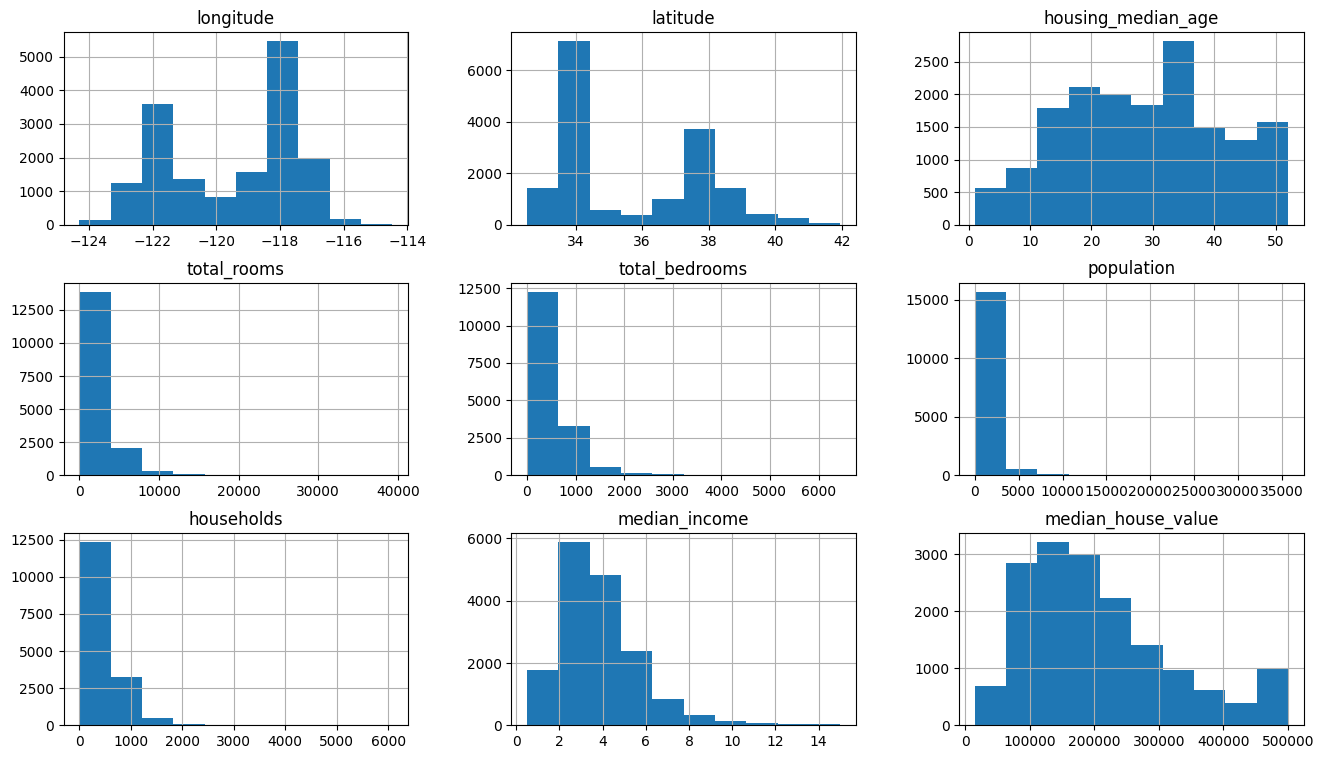

In [26]:
train_data.hist(figsize=(16,9))

In [42]:
train_data.corr(method='pearson', numeric_only=True)
#have restricted the correlation to only numeric value and have excluded the proximity to ocean in this 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924569,-0.105929,0.041967,0.066428,0.097437,0.053321,-0.015036,-0.042820
latitude,-0.924569,1.000000,0.008619,-0.034505,-0.064566,-0.108073,-0.069733,-0.080873,-0.146963
housing_median_age,-0.105929,0.008619,1.000000,-0.357180,-0.317607,-0.293744,-0.300021,-0.113866,0.106756
total_rooms,0.041967,-0.034505,-0.357180,1.000000,0.929661,0.857201,0.918640,0.200774,0.138314
total_bedrooms,0.066428,-0.064566,-0.317607,0.929661,1.000000,0.878295,0.979518,-0.006194,0.051310
population,0.097437,-0.108073,-0.293744,0.857201,0.878295,1.000000,0.907477,0.009422,-0.019611
households,0.053321,-0.069733,-0.300021,0.918640,0.979518,0.907477,1.000000,0.016156,0.068019
median_income,-0.015036,-0.080873,-0.113866,0.200774,-0.006194,0.009422,0.016156,1.000000,0.691588
median_house_value,-0.042820,-0.146963,0.106756,0.138314,0.051310,-0.019611,0.068019,0.691588,1.000000


In [1]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(method='pearson', numeric_only=True), annot=True, cmap="YlGnBu")

NameError: name 'plt' is not defined